<a href="https://colab.research.google.com/github/Revanthch/INFO-5502/blob/main/INFO_5502_Final_Exam_Summer_2022.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### INFO 5502 Final Exam (05/12/2022, 500 points in total)

<span style='background:yellow'>**Question 1 (100 pt).**</span> We want to create a birthday frequency graph using the data on births in the United States, provided by the Centers for Disease Control (CDC). You can download the data from my GitHub link:https://github.com/unt-iialab/info5502-spring2022/blob/main/datasets/births.csv 

Please visualize the data as the following figure using python (you can use any data visualization packages):

![final-exam.png](attachment:final-exam.png)

![title](https://github.com/suthapalliuday/Rough-Work/blob/main/SciBERT_cm.png)

In [ ]:
#### You code here
import matplotlib.pyplot as plt
import matplotlib as mpl
plt.style.use('seaborn')
import numpy as np
import pandas as pd




/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  # Remove the CWD from sys.path while we load stuff.
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:14: FutureWarning: The pandas.datetime class is deprecated and will be removed from pandas in a future version. Import from datetime module instead.
  


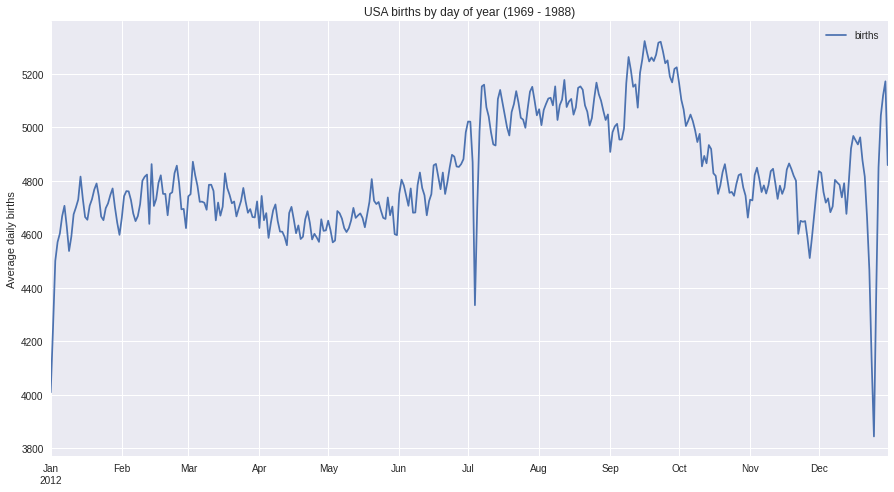

In [ ]:
data = pd.read_csv("https://raw.githubusercontent.com/unt-iialab/info5502-spring2022/main/datasets/births.csv")
data.head()

quartiles = np.percentile(data['births'], [25, 50, 75])
mu = quartiles[1]
sig = 0.5 * (quartiles[2] - quartiles[0])

births = data.query('(births > @mu - 5 * @sig) & (births < @mu + 5 * @sig)')

births['day'] = births['day'].astype(int)

births.index = pd.to_datetime(10000 * births.year + 100 * births.month + births.day, format='%Y%m%d')
births_by_date = births.pivot_table('births', [births.index.month, births.index.day])
births_by_date.index = [pd.datetime(2012, month, day) for (month, day) in births_by_date.index]

fig, ax = plt.subplots(figsize=(15, 8))
plt.title("USA births by day of year (1969 - 1988)")
plt.ylabel("Average daily births")
births_by_date.plot(ax=ax)

<span style='background:yellow'>**Question 2 (100 pt).**</span> Write a python program to evaluate the text classification performance using accuracy, precision, recall, and f1 score. 

Accuracy = (TP + TN) / (TP+ TN+ FP+ FN)

Recall = (TP) / (TP+FN)

Precision = (TP) / (TP+FP)

F1 Score = (2*Precision*Recall) / (Precision + Recall)

Here is the confusion matrix of a text classfication task (six categories) on the testing data. 

![SciBERT_cm.png](attachment:SciBERT_cm.png)

In [5]:
#### You code here
import numpy as nu



In [6]:
confusionMatrix = [[157,46,25,22,15,3],
                   [28,151,45,18,1,6],
                   [11,38,135,14,3,7],
                   [11,15,18,70,6,4],
                   [14,12,14,7,56,2],
                   [12,7,6,5,5,16]]

con = nu.array(confusionMatrix)
k=len(con)
for i in range(k):
    a,P,R,f1score= 0,0,0,0
    TP = con[i,i]
    FP = con[i,:].sum()-TP
    FN = con[:,i].sum()-TP
    TN = con.sum().sum()-(TP+FP+FN)
    a= (TP+TN)/(TP+ TN+ FP+ FN)
    P = TP/(TP+FP)
    R = TP/(TP+FN)
    f1score = 2*P*R/(P+R)
    print(f'The f1 score of class{i} is {f1score}')
    print(f'The recall of class{i} is {R}')
    print(f'The precision of class{i} is {P}')
    print(f'The accuracy of class{i} is {a}')

The f1 score of class0 is 0.626746506986028
The recall of class0 is 0.6738197424892703
The precision of class0 is 0.585820895522388
The accuracy of class0 is 0.8139303482587065
The f1 score of class1 is 0.583011583011583
The recall of class1 is 0.5613382899628253
The precision of class1 is 0.606425702811245
The accuracy of class1 is 0.7850746268656716
The f1 score of class2 is 0.598669623059867
The recall of class2 is 0.5555555555555556
The precision of class2 is 0.6490384615384616
The accuracy of class2 is 0.8199004975124378
The f1 score of class3 is 0.5384615384615384
The recall of class3 is 0.5147058823529411
The precision of class3 is 0.5645161290322581
The accuracy of class3 is 0.8805970149253731
The f1 score of class4 is 0.5863874345549738
The recall of class4 is 0.6511627906976745
The precision of class4 is 0.5333333333333333
The accuracy of class4 is 0.9213930348258706
The f1 score of class5 is 0.3595505617977528
The recall of class5 is 0.42105263157894735
The precision of clas

<span style='background:yellow'>**Question 3 (200 pt).**</span> 

Part A: Given Inetd dataset, an intrusion detection dataset that contains 2 columns. The first column represents a process ID number (PID) and the second column represents a system call. The goal is to extract the entire system call sequence by its PID, then tokenize and parse each sequence into 25-grams. After this, we’ll split the data into training and testing sets. Next, we ensure data quality in the training dataset by removing duplicate sequences within each class and overlapped sequences between both classes. To ensure a fair evaluation, we also clean the testing set by repeating the previous step. You will implement a Decision Tree model to train and test on the training set and testing set that we just clean. 


Part B: As the data type is sequential, we want to know how similar the sequences from both classes are and visualize how the similarity scores vary in different sequence lengths. Compute a cosine similarity score of 100 random pairs from both classes and get a median cosine similarity. Repeat this step in different sequence lengths (5, 10, 15, and 20). Plot a line chart to visualize how the median cosine similarities vary through sequence lengths of 5 to 25. 

You can download the datasets from github: https://github.com/unt-iialab/info5502-spring2022/tree/main/finalexam/q4


Step by step instructions and questions:

(1)(30 points) Attached are the Normal and Intrusion data folders. Read in the data and store them in two separate dataframes. Combine the system calls (the second column) from the same PID (the first column) into a sequence or a string. 

(2)(30 points) Parse an entire sequence into smaller sequences of size 25. (Hint: Use word_tokenize and ngrams from nltk library to parse).

(3)(30 points) Add labels to the data, and partition the labeled data into training data and testing data with a ratio of 70/30.

(4)(30 points) As the dataset has a lot of duplicate sequences, make sure that the testing data only contain unique sequences and that these sequences do not exist in the training data. Condense training data and testing data into two sets. Take the difference between the testing set and training set to remove the overlapped sequences from the testing data. 

(5)(30 points) The sequences from each class can be repetitive, and some of these sequences may have different labels. Therefore, we need to remove the duplicate sequences within each class and the overlapped sequences from the Intrusion class. Start out by separating the Normal class and Intrusion class in both training and testing data. Use the same concept in Question 4 to remove duplicate sequences and overlapped sequences from the training data.


(6)(50 points) Bootstrap the training data to get the same number of sequences from each class. Train and evaluate a Decision Tree model using the training data and testing data that we just clean. How is the performance?


In [4]:
#### You code here
import pandas as pd
import numpy as np

# reading the data from github
dataset = "https://raw.githubusercontent.com/unt-iialab/info5502-spring2022/main/finalexam/q4/"
def read_data(name, seperator, column1, column2):
  data = pd.read_csv(dataset+name,sep = seperator, header = None)
  data.columns = [column1, column2]
  return data

df1 = read_data("inetd-intrusion.int", " ", "PID","systemcalls")
df1

,PID,systemcalls
0,167,90
1,167,125
2,167,125
3,167,106
4,167,5
...,...,...
8366,4470,6
8367,4470,6
8368,4470,6
8369,4470,6


In [ ]:
df2 = read_data("inetd-normal.int", " ", "PID","systemcalls")

df2

,PID,systemcalls
0,167,90
1,167,125
2,167,125
3,167,106
4,167,5
...,...,...
536,2669,6
537,2669,6
538,2669,6
539,2669,6


In [ ]:
def combine_calls(hash1, df):
  data = set(df['PID'].values)
  data = list(data)
  for x in data:
    hash1[x] = " ".join(str(value) for value in list(df[df['PID'] == x]['systemcalls'].values))
  return hash1

hash1 = {}
combined_data = combine_calls(hash1, df1)

combined_data[168]

'66 12 5 63 63 63 6 5 20 108 90 4 6 91 76 5 108 90 3 126 126 5 45 108 90 3 3 6 91 5 108 90 3 19 6 91 102 102 102 102 126 126 5 108 90 3 19 6 91 102 102 102 102 126 126 5 108 90 3 19 6 91 102 102 102 102 126 126 5 108 90 3 19 6 91 102 102 102 102 126 126 5 108 90 3 19 6 91 102 102 102 102 45 126 126 5 108 90 3 19 6 91 102 102 102 126 126 5 108 90 3 19 6 91 102 102 102 126 126 5 108 90 3 19 6 91 102 102 102 102 126 126 5 108 90 3 19 6 91 102 102 102 102 126 126 5 108 90 3 19 6 91 102 102 102 102 126 126 5 108 90 3 19 6 91 102 102 102 102 126 126 5 108 90 3 19 6 91 102 102 102 102 126 126 5 108 90 3 19 6 91 102 102 102 126 126 5 108 90 3 19 6 91 102 102 102 102 3 6 91 126 126 67 67 67 67 67 82 55 102 55 126 78 2 126 6 82 114 114 119 126 67 13 27 72 119 13 67 27 126 82 55 102 55 126 78 2 126 6 82 114 114 119 126 67 13 27 72 119 13 67 27 126 82 55 102 55 126 2 126 6 82 114 114 119 126 67 13 27 72 119 13 67 27 126 82 55 102 55 126 2 126 6 82 55 102 55 126 2 126 6 82 55 102 55 126 2 126 6 82 

In [ ]:
hash2 = {}
combined_data_2 = combine_calls(hash2, df2)
combined_data_2[168]

'66 12 5 63 63 63 6 5 20 108 90 4 6 91 76 5 108 90 3 126 126 5 45 108 90 3 3 6 91 5 108 90 3 19 6 91 102 102 102 102 126 126 5 108 90 3 19 6 91 102 102 102 102 126 126 5 108 90 3 19 6 91 102 102 102 102 126 126 5 108 90 3 19 6 91 102 102 102 102 126 126 5 108 90 3 19 6 91 102 102 102 102 45 126 126 5 108 90 3 19 6 91 102 102 102 126 126 5 108 90 3 19 6 91 102 102 102 126 126 5 108 90 3 19 6 91 102 102 102 102 126 126 5 108 90 3 19 6 91 102 102 102 102 126 126 5 108 90 3 19 6 91 102 102 102 102 126 126 5 108 90 3 19 6 91 102 102 102 102 126 126 5 108 90 3 19 6 91 102 102 102 102 126 126 5 108 90 3 19 6 91 102 102 102 126 126 5 108 90 3 19 6 91 102 102 102 102 3 6 91 126 126 67 67 67 67 67 82 55 102 55 126 78 2 126 6 82 114 114 119 126 67 13 27 72 119 13 67 27 126 82'

In [ ]:
import re
from nltk.util import ngrams
# generating data(ngrams) with sequence length of 25
def generate_sequence(hash_data,list1):
  for k in hash_data.keys():
      x = hash_data[k]
      tokens = [token_value for token_value in x.split(" ") if not token_value == ""]
      for i in list(ngrams(tokens, 25)):
          list1.append(i)
  return len(list1), list1

seq_list1 = [] 
length, seq_list1 = generate_sequence(hash1, seq_list1)

print(length)


7627


In [ ]:
seq_list2 = []
length, seq_list2 = generate_sequence(hash2, seq_list2)
print(length)

469


In [ ]:
#printing data sample
print(seq_list1[0:2])
print(seq_list2[0:2])

[('126', '5', '45', '108', '90', '3', '19', '6', '91', '63', '6', '63', '63', '6', '6', '6', '6', '6', '6', '6', '6', '6', '6', '6', '6'), ('5', '45', '108', '90', '3', '19', '6', '91', '63', '6', '63', '63', '6', '6', '6', '6', '6', '6', '6', '6', '6', '6', '6', '6', '6')]
[('66', '12', '5', '63', '63', '63', '6', '5', '20', '108', '90', '4', '6', '91', '76', '5', '108', '90', '3', '126', '126', '5', '45', '108', '90'), ('12', '5', '63', '63', '63', '6', '5', '20', '108', '90', '4', '6', '91', '76', '5', '108', '90', '3', '126', '126', '5', '45', '108', '90', '3')]


In [ ]:
#3 add label category by converting list to df
def convert_list_to_df(list1, label):
  data = pd.DataFrame(list1)
  data['category'] = label
  return data

In [ ]:
intrusion_df = convert_list_to_df(seq_list1, 1)
intrusion_df.shape

(7627, 26)

In [ ]:
normal_df = convert_list_to_df(seq_list2, 0)
normal_df.shape

(469, 26)

In [ ]:
# merge two dataframes into single dataframe
def remove_duplicates_n_merge_df(df1, df2):
  common_df = pd.DataFrame()
  common_df = common_df.append(df1)
  common_df = common_df.append(df2)
  return common_df, common_df.shape
data, data_shape = remove_duplicates_n_merge_df(normal_df,intrusion_df)
print(data_shape)
# print(data)

(8096, 26)


In [ ]:
#pring data columns excluding category label by cleaning duplicate data
common_df = data.drop_duplicates(subset = data.columns[:-1], keep = 'last')
data.columns[:-1]

Index([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17,
       18, 19, 20, 21, 22, 23, 24],
      dtype='object')

In [ ]:
# split data into training and testing level at 70:30 ratio using sklearn train_test_split
from sklearn.model_selection import train_test_split
features = data.drop("category", axis = 1)
feature_target = data['category']
x_train, x_test, y_train, y_test = train_test_split(features, feature_target, test_size = 0.3)
print("train test data split shapes:",x_train.shape, x_test.shape, y_train.shape, y_test.shape)


train test data split shapes: (5667, 25) (2429, 25) (5667,) (2429,)


In [ ]:
#Decision tree classifier on cleaned data 
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import classification_report
dectreeclassifier = DecisionTreeClassifier(max_depth = 10)
decision_tree_data_fit = dectreeclassifier.fit(x_train, y_train)
prediction = dectreeclassifier.predict(x_test)

print(classification_report(y_test, prediction))


              precision    recall  f1-score   support

           0       0.31      0.12      0.17       157
           1       0.94      0.98      0.96      2272

    accuracy                           0.93      2429
   macro avg       0.62      0.55      0.57      2429
weighted avg       0.90      0.93      0.91      2429



In [ ]:
#To know RMSE value from the above prediction data obtained
import math
Root_Mean_Square_Error=math.sqrt(np.square(np.subtract(prediction,y_test)).mean())
print("RMSE Error",Root_Mean_Square_Error)
print("Model Score",decision_tree_data_fit.score(x_train,y_train))

RMSE Error 0.2729766690326237
Model Score 0.9486500794070937


<span style='background:yellow'>**Question 4 (100 pt).**</span> In the world of business, the importance of the customers’ reviews for any product is not ignorable. The impact of customers’ reviews on customer’s decision making is significant. Therefore, businesses try to increase this impact by increasing the ratio of the positive reviews to negative reviews. One effective way to increase the ratio is offering the incentives such as small gifts or free next services to customers to post the reviews for item they purchase or used. However, it is not always the case, and customer may post their reviews without receiving or accepting the incentives. So, the reviews could be in either incentivized or non-incentivized category.


Considering the importance of reviews, in this question you need to compare these two categories of reviews. One method to compare the effectiveness of two categories is conducting the A/B testing.


The Software_Reviews dataset is collected from software review products, and it is combination of several small datasets. Find the dataset as an attachment on the left side of the page.


You can downlaod the dataset from github: https://github.com/unt-iialab/info5502-spring2022/blob/main/finalexam/Software_Reviews_csv_files_S.csv

(1)(50 points) Clean the dataset before you use (You need to know this dataset is combinations of the several CSV files with title rows. So, there are extra title rows in the middle of the file, which they need to be removed.)


(2)(50 points) Apply an A/B test": consider the “incentivized” column as main column for A & B groups.

a. The “incentivized” column includes ‘NominalGift’, ‘VendorReferredIncentivized’, ‘NoIncentive’, ‘NonNominalGift’, ‘VendorReferred’, ‘None’

b. Group A (Incentive): ‘NominalGift’, and ‘VendorReferredIncentivized’

c. Group B (NoIncentive): ‘NoIncentive’, ‘NonNominalGift’, ‘VendorReferred’

d. Make the decision if ‘None’ includes in either Group A or B or remove that.

e. The “OverAllRating” is another column that is used to compare groups A and B.

Which one A or B group has higher “OverAllRating”?

In [ ]:
#### You code and your answer here here

from google.colab import drive 

data = pd.read_csv("https://raw.githubusercontent.com/unt-iialab/info5502-spring2022/main/finalexam/Software_Reviews_csv_files_S.csv")

data.drop_duplicates()

import numpy as np
from scipy.stats import norm

import matplotlib.pyplot as plt

data.dropna(subset=['incentivized'], inplace = True)

#.shape
grup_a = data[(data['incentivized'] == "NominalGift") | (data['incentivized'] == "VendorReferredIncentivized")]['OverAllRating']
grup_b = data[(data['incentivized'] == "NoIncentive") | (data['incentivized'] == "NonNominalGift") | (data['incentivized'] == "VendorReferred")]['OverAllRating']#.shape

grup_a=grup_a.astype(float)
grup_b=grup_b.astype(float)
r_con = grup_a.shape[0]
c_exp = grup_b.shape[0]

# Significance Level
alpha = 0.05

m_con = np.mean(grup_a)
g_exp = np.mean(grup_b)

#z = grup_a.astype(float)
variance_con = np.var(grup_a)

#k = grup_b.astype(float)
variance_exp = np.var(grup_b)

# Pooled Variance
pooled_variance = np.sqrt(variance_con/r_con + variance_exp/c_exp)

# Test statistics
Test_statistics = (m_con-g_exp)/np.sqrt(variance_con/r_con + variance_exp/c_exp)

# two sided test and using symmetry property of Normal distibution so we multiple with 2
p_value = norm.sf(Test_statistics)*2

# Z-critical value
Z_critical  = norm.ppf(1-alpha/2)

# Margin of error
Margin = Z_critical*pooled_variance

# Confidence Interval
Confidence = [(m_con - g_exp) - Margin, (m_con - g_exp) + Margin]


print("Test Statistics is: ", Test_statistics)
print("Z-critical is: ", Z_critical)
print("P_value is: ", p_value)
print("Confidence Interval of two samples: ", np.round(Confidence,2))




Test Statistics is:  -3.7545568216338165
Z-critical is:  1.959963984540054
P_value is:  1.9998263515499213
Confidence Interval of two samples:  [-0.22 -0.07]


In [ ]:
from google.colab import drive
drive.mount('/content/drive')